<a href="https://colab.research.google.com/github/rmtu14/ATM-/blob/main/Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Reading the CSV file and putting it into 'df' object.
# Replace 'your_file.csv' with the actual file path.
df = pd.read_csv(r'/content/adult_dataset-1.csv')

# Display the first few rows of the dataframe to inspect the data
print("First few rows of the DataFrame:")
print(df.info())




First few rows of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [159]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [160]:
df = df[df['workclass'] != '?']
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [161]:
df = df[df['occupation'] != '?']
df = df[df['native.country'] != '?']

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [163]:
# Assuming df is your DataFrame
# Selecting only categorical columns
df_categorical = df.select_dtypes(include='object')

# Printing the first 5 rows of categorical columns
print("First 5 rows of Categorical Columns:")
df_categorical.head()


First 5 rows of Categorical Columns:


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [164]:
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [165]:
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.tail()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
32556,22,310152,10,0,0,40,2,15,4,10,1,4,1,38,0
32557,27,257302,12,0,0,38,2,7,2,12,5,4,0,38,0
32558,40,154374,9,0,0,40,2,11,2,6,0,4,1,38,1
32559,58,151910,9,0,0,40,2,11,6,0,4,4,0,38,0
32560,22,201490,9,0,0,20,2,11,4,0,3,4,1,38,0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int64
 7   education       30162 non-null  int64
 8   marital.status  30162 non-null  int64
 9   occupation      30162 non-null  int64
 10  relationship    30162 non-null  int64
 11  race            30162 non-null  int64
 12  sex             30162 non-null  int64
 13  native.country  30162 non-null  int64
 14  income          30162 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [167]:
df['income']= df['income'].astype('category')

In [168]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and you have already dropped or processed the categorical columns

# Define features (X) and target variable (y)
X = df.drop('income', axis=1)  # Replace 'your_target_column' with the actual target column name
y = df['income']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (21113, 14)
Shape of X_test: (9049, 14)
Shape of y_train: (21113,)
Shape of y_test: (9049,)


In [169]:
X_train.tail()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
10712,31,185528,10,0,0,35,2,15,0,11,3,4,0,38
3426,35,145704,9,3942,0,35,2,11,2,9,5,4,0,38
14561,44,326232,4,0,0,48,2,5,0,5,1,4,1,38
25431,18,184693,10,0,0,20,2,15,4,7,3,4,0,25
31627,34,167893,10,0,0,64,2,15,2,9,0,4,1,38


In [170]:
from sklearn.tree import DecisionTreeClassifier

# Assuming you have already imported or created X_train, X_test, y_train, y_test

# Create a Decision Tree Classifier
df_default = DecisionTreeClassifier(max_depth=5)

# Train the classifier on the training data
df_default.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5)

In [171]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already imported or created X and y
# Assuming you have already split the data into training and testing sets

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy Score: 0.8078240689578959

Confusion Matrix:
[[5948  919]
 [ 820 1362]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6867
           1       0.60      0.62      0.61      2182

    accuracy                           0.81      9049
   macro avg       0.74      0.75      0.74      9049
weighted avg       0.81      0.81      0.81      9049



In [172]:
from sklearn.metrics import confusion_matrix

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[5948  919]
 [ 820 1362]]


In [173]:
from sklearn import tree
features = list(df.columns[1:])
cls=[">50","<=50"]

In [174]:
print(features)
print(cls)

['fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
['>50', '<=50']


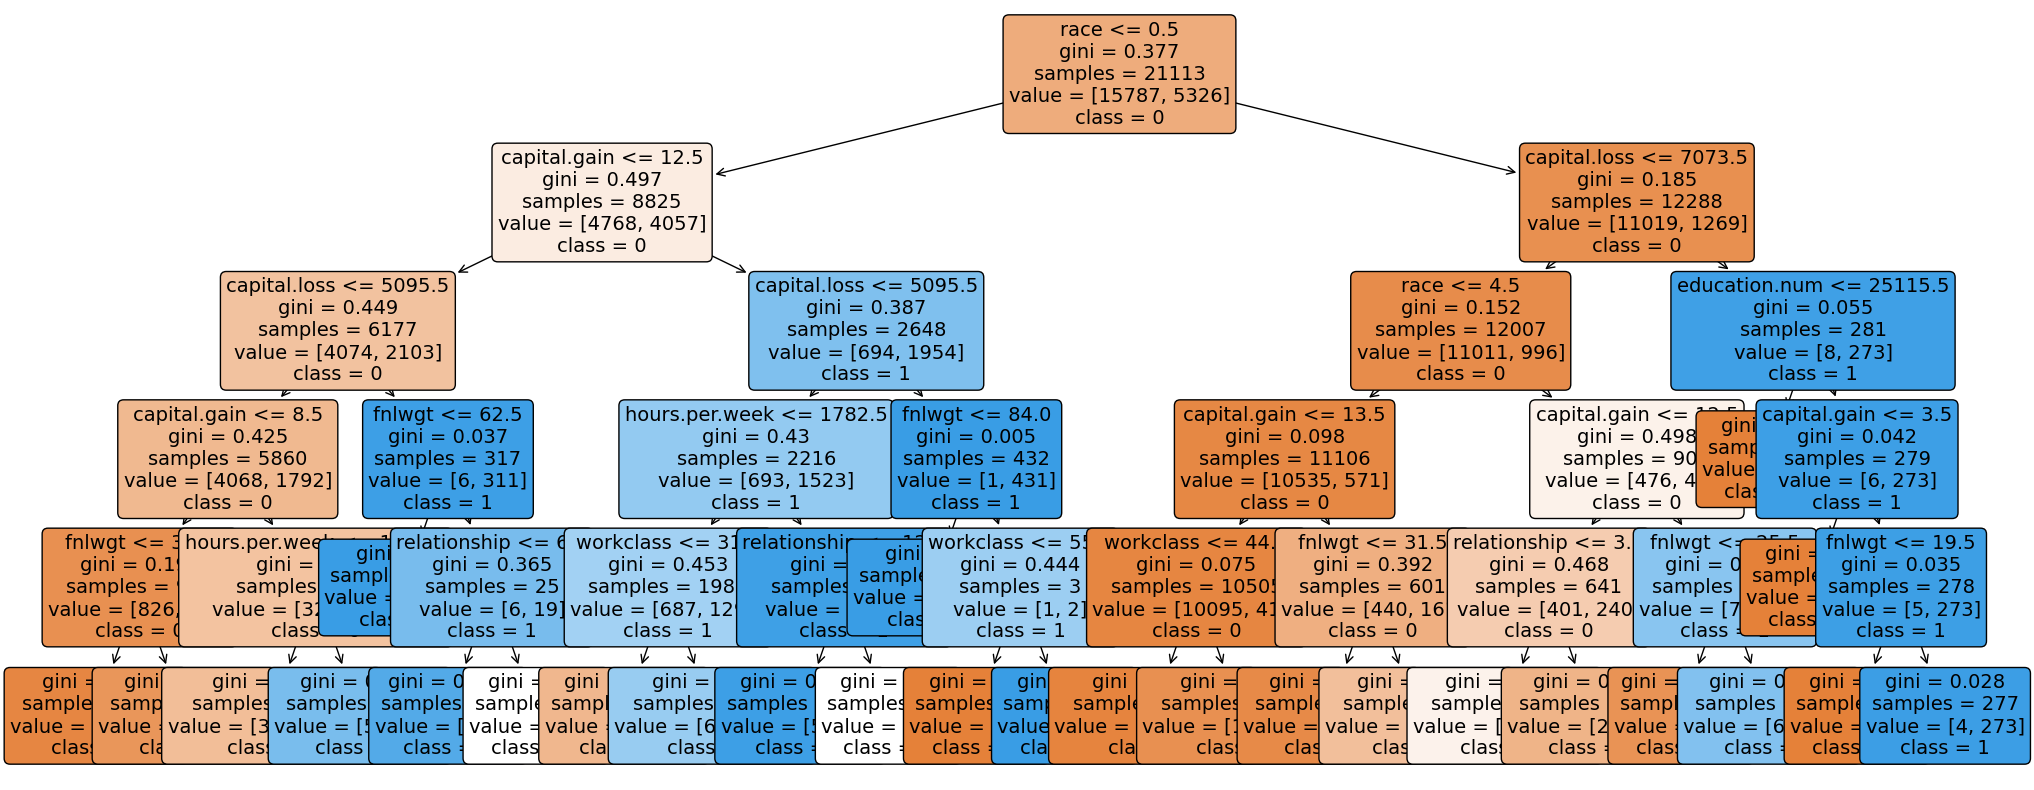

In [175]:
plt.figure(figsize=(25,10))
plt.tight_layout()
a = tree.plot_tree(df_default,feature_names=features,class_names=["0","1"],filled=True,rounded=True,fontsize=14)

In [176]:
text_representation = tree.export_text(df_default)
print(text_representation)

|--- feature_10 <= 0.50
|   |--- feature_2 <= 12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_2 <= 8.50
|   |   |   |   |--- feature_0 <= 37.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  37.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  8.50
|   |   |   |   |--- feature_4 <= 1846.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  1846.00
|   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  5095.50
|   |   |   |--- feature_0 <= 62.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  62.50
|   |   |   |   |--- feature_9 <= 6.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_9 >  6.50
|   |   |   |   |   |--- class: 0
|   |--- feature_2 >  12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_4 <= 1782.50
|   |   |   |   |--- feature_5 <= 31.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  31.00
|   |   |   |   |   |--- class: 1
|   |   |   |-

In [177]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Specify the number of folds for k-fold CV (we are taking 5)
n_folds = 5

# Parameters to build the model on (As of now just max_depth from range 1 to 40)
parameters = {'max_depth': range(1, 40)}

# Instantiate the model (DecisionTreeClassifier) with criteria gini and random_state as 100
dtree = DecisionTreeClassifier(criterion='gini', random_state=100)

# Instantiate GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
tree = GridSearchCV(estimator=dtree, param_grid=parameters, scoring='accuracy', cv=n_folds, return_train_score=True)
tree.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [178]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015795,0.002998,0.003825,0.000914,1,{'max_depth': 1},0.747810,0.747810,0.747573,0.747750,...,0.747738,0.000087,39,0.747721,0.747721,0.747780,0.747735,0.747735,0.747738,0.000022
1,0.017533,0.000831,0.003261,0.000856,2,{'max_depth': 2},0.812219,0.818612,0.820507,0.825675,...,0.819969,0.004538,16,0.821906,0.820308,0.819834,0.818542,0.819253,0.819969,0.001134
2,0.023050,0.000304,0.003098,0.000080,3,{'max_depth': 3},0.828558,0.834241,0.834478,0.836570,...,0.834273,0.003115,12,0.835998,0.834577,0.834458,0.833758,0.833758,0.834510,0.000819
3,0.031458,0.003197,0.003404,0.000563,4,{'max_depth': 4},0.832583,0.840871,0.842529,0.842729,...,0.840193,0.003860,9,0.841622,0.839491,0.844997,0.838908,0.845421,0.842088,0.002707
4,0.035338,0.001740,0.003140,0.000023,5,{'max_depth': 5},0.834241,0.844897,0.847265,0.842729,...,0.843319,0.004858,7,0.844287,0.844227,0.849319,0.841572,0.849683,0.845818,0.003165


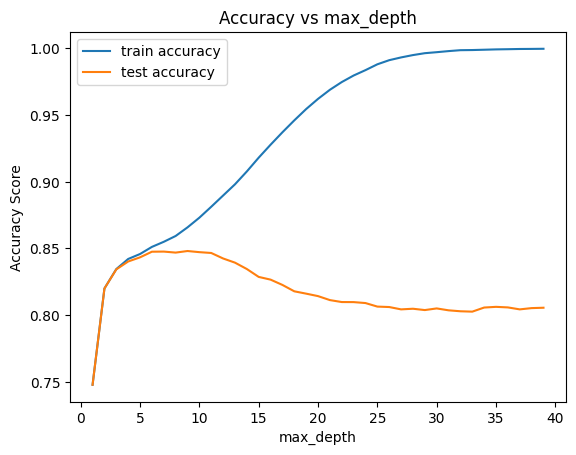

In [179]:

plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label='train accuracy')
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label='test accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs max_depth')
plt.legend()
plt.show()


In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Specify the number of folds for k-fold CV (here 5)
n_folds = 5

# Parameters to build the model on (just min_samples_leaf with a range 5 to 200 and with a step of 20)
parameters = {'min_samples_leaf': range(5, 200, 20)}

# Instantiate the model (DecisionTreeClassifier)
dtree = DecisionTreeClassifier(random_state=100)

# Instantiate GridSearchCV with the specified parameters
tree = GridSearchCV(estimator=dtree, param_grid=parameters, scoring='accuracy', cv=n_folds, return_train_score=True)

# Fit the GridSearchCV object on the training data
tree.fit(X_train, y_train)

# Extract the scores of GridSearch CV
scores = pd.DataFrame(tree.cv_results_)

# Display the DataFrame with the results
print(scores[['param_min_samples_leaf', 'mean_fit_time', 'std_fit_time', 'mean_test_score', 'std_test_score', 'rank_test_score']])


  param_min_samples_leaf  mean_fit_time  std_fit_time  mean_test_score  \
0                      5       0.118277      0.002193         0.823616   
1                     25       0.097943      0.001680         0.844788   
2                     45       0.088989      0.005266         0.848293   
3                     65       0.087693      0.009171         0.845830   
4                     85       0.082827      0.002739         0.845214   
5                    105       0.076213      0.002173         0.844930   
6                    125       0.076927      0.003608         0.844456   
7                    145       0.073001      0.003528         0.845120   
8                    165       0.060301      0.007985         0.842988   
9                    185       0.049222      0.001252         0.842325   

   std_test_score  rank_test_score  
0        0.003696               10  
1        0.004651                6  
2        0.003194                1  
3        0.005589                2  


In [181]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.118277,0.002193,0.005669,0.000744,5,{'min_samples_leaf': 5},0.825716,0.827848,0.819560,0.826149,...,0.823616,0.003696,10,0.915335,0.911782,0.915335,0.912083,0.913149,0.913537,0.001537
1,0.097943,0.001680,0.004897,0.000060,25,{'min_samples_leaf': 25},0.841819,0.851291,0.839451,0.842018,...,0.844788,0.004651,6,0.868028,0.869686,0.871226,0.867503,0.869872,0.869263,0.001343
2,0.088989,0.005266,0.004834,0.000161,45,{'min_samples_leaf': 45},0.843003,0.849159,0.846555,0.851018,...,0.848293,0.003194,1,0.861042,0.860154,0.862581,0.860399,0.863714,0.861578,0.001362
3,0.087693,0.009171,0.005305,0.000834,65,{'min_samples_leaf': 65},0.841108,0.852711,0.845371,0.851492,...,0.845830,0.005589,2,0.857549,0.855773,0.858555,0.855189,0.858149,0.857043,0.001328
4,0.082827,0.002739,0.005202,0.000798,85,{'min_samples_leaf': 85},0.838030,0.849159,0.845371,0.851492,...,0.845214,0.004834,3,0.853108,0.853108,0.855654,0.854005,0.854597,0.854095,0.000963


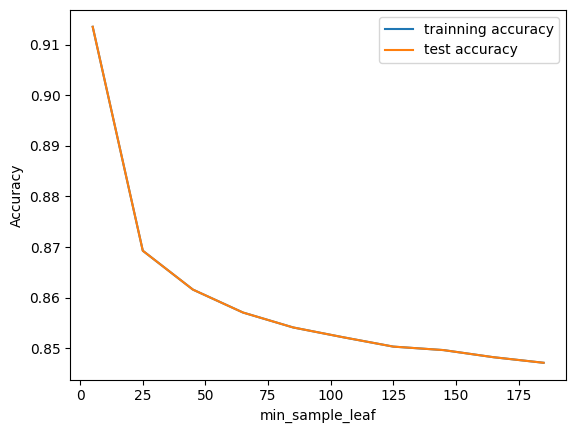

In [182]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="trainning accuracy")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Specify the number of folds for k-fold CV
n_folds = 5

# Parameters to build the model on (here just min_samples_split with range 5 to 200 with a step size of 20)
parameters = {'min_samples_split': range(5, 200, 20)}

# Instantiate the model (DecisionTreeClassifier)
dtree = DecisionTreeClassifier(random_state=100)

# Instantiate GridSearchCV with the specified parameters
tree = GridSearchCV(estimator=dtree, param_grid=parameters, scoring='accuracy', cv=n_folds, return_train_score=True)

# Fit the GridSearchCV object on the training data
tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [184]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.091222,0.003915,0.003777,0.000074,5,{'min_samples_split': 5},0.811982,0.811035,0.818376,0.811701,...,0.812296,0.003296,10,0.969094,0.969331,0.969509,0.970458,0.971227,0.969924,0.000800
1,0.082912,0.001348,0.003621,0.000106,25,{'min_samples_split': 25},0.825006,0.825243,0.830215,0.822596,...,0.826126,0.002581,9,0.906927,0.906513,0.906986,0.906577,0.911847,0.907770,0.002047
2,0.081911,0.003848,0.003551,0.000020,45,{'min_samples_split': 45},0.835188,0.839687,0.830215,0.827333,...,0.834225,0.004783,8,0.890527,0.890053,0.889816,0.888521,0.896335,0.891051,0.002725
3,0.079297,0.000639,0.003557,0.000050,65,{'min_samples_split': 65},0.839451,0.845844,0.837556,0.833728,...,0.840098,0.004360,7,0.883896,0.882238,0.883245,0.880765,0.884258,0.882880,0.001261
4,0.080436,0.002751,0.003519,0.000089,85,{'min_samples_split': 85},0.846081,0.853895,0.838977,0.837281,...,0.844314,0.005898,6,0.877383,0.877442,0.879515,0.875081,0.880706,0.878025,0.001940


In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid (we already defined for you)
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# Number of folds (5)
n_folds = 5

# Instantiate the grid search model with default parameters value
dtree = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV with the specified parameters
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, scoring='accuracy', cv=n_folds, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# CV results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Print CV results
print(cv_results)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.038100      0.000859         0.003216        0.000077   
1        0.037840      0.000485         0.003565        0.000822   
2        0.037427      0.000493         0.003596        0.000592   
3        0.038744      0.002362         0.003450        0.000254   
4        0.061119      0.001668         0.003353        0.000033   
5        0.059708      0.001086         0.003477        0.000274   
6        0.058541      0.001979         0.003626        0.000415   
7        0.057987      0.003894         0.003363        0.000099   
8        0.034397      0.001131         0.003189        0.000099   
9        0.034389      0.000123         0.003430        0.000547   
10       0.034719      0.000793         0.003213        0.000063   
11       0.035560      0.002282         0.003489        0.000633   
12       0.055820      0.000406         0.003454       

In [186]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038100,0.000859,0.003216,0.000077,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
1,0.037840,0.000485,0.003565,0.000822,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
2,0.037427,0.000493,0.003596,0.000592,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
3,0.038744,0.002362,0.003450,0.000254,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
4,0.061119,0.001668,0.003353,0.000033,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
5,0.059708,0.001086,0.003477,0.000274,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
6,0.058541,0.001979,0.003626,0.000415,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
7,0.057987,0.003894,0.003363,0.000099,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
8,0.034397,0.001131,0.003189,0.000099,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9
9,0.034389,0.000123,0.003430,0.000547,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9


In [187]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8510400232064759
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


Accuracy Score: 0.850922753895458


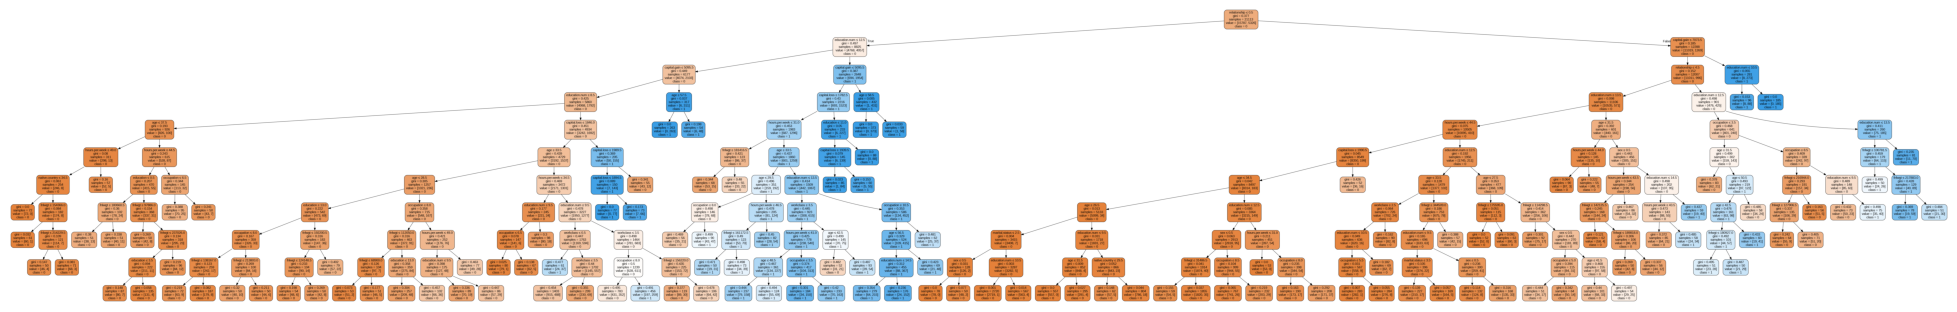

In [188]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

# Model with optimal hyperparameters, also add random state as 100
clf_gini = DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50, random_state=100)

# Fitting the above model with training data
clf_gini.fit(X_train, y_train)

# Accuracy score
accuracy = clf_gini.score(X_test, y_test)
print("Accuracy Score:", accuracy)

# Importing tree for visualization
from sklearn.tree import export_graphviz
import graphviz

# Plotting the tree
plt.figure(figsize=(25, 10))
export_graphviz(clf_gini, out_file='tree.dot', feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)

# Convert the dot file to a PNG image (make sure Graphviz is installed on your machine)
!dot -Tpng tree.dot -o tree.png
plt.imshow(plt.imread('tree.png'))
plt.axis('off')
plt.show()


Accuracy Score with max_depth=3: 0.8392087523483258


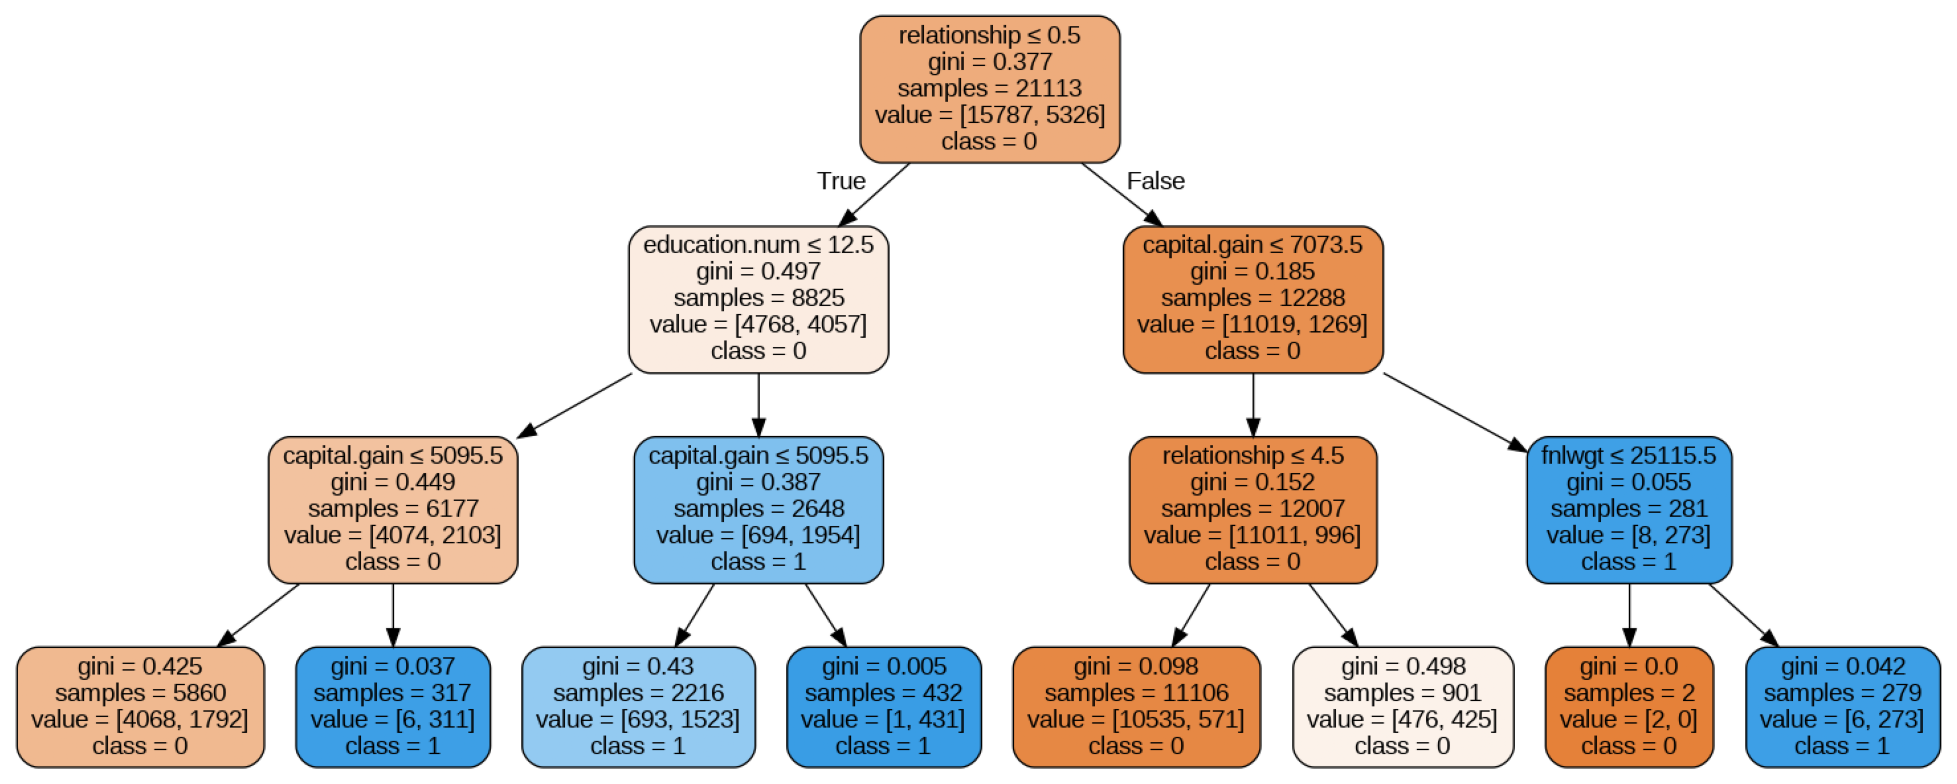

In [189]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt

# Tree with max_depth=3
clf_gini_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=100)

# Fitting the model with training data
clf_gini_depth_3.fit(X_train, y_train)

# Print model score
accuracy_depth_3 = clf_gini_depth_3.score(X_test, y_test)
print("Accuracy Score with max_depth=3:", accuracy_depth_3)

# Plotting tree with max_depth=3
plt.figure(figsize=(25, 10))
export_graphviz(clf_gini_depth_3, out_file='tree_depth_3.dot', feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)

# Convert the dot file to a PNG image (make sure Graphviz is installed on your machine)
!dot -Tpng tree_depth_3.dot -o tree_depth_3.png
plt.imshow(plt.imread('tree_depth_3.png'))
plt.axis('off')
plt.show()


In [190]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the testing data
y_pred_depth_3 = clf_gini_depth_3.predict(X_test)

# Print classification report
print("Classification Report with max_depth=3:")
print(classification_report(y_test, y_pred_depth_3))

# Print confusion matrix
print("Confusion Matrix with max_depth=3:")
print(confusion_matrix(y_test, y_pred_depth_3))


Classification Report with max_depth=3:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6867
           1       0.77      0.47      0.59      2182

    accuracy                           0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049

Confusion Matrix with max_depth=3:
[[6564  303]
 [1152 1030]]


In [191]:
from sklearn.tree import DecisionTreeClassifier

# Initialize cost_complexity_pruning_path with training data
path = clf_gini.cost_complexity_pruning_path(X_train, y_train)

# Extract ccp_alphas and impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Print all alphas
print("CCP Alphas:")
print(ccp_alphas)


CCP Alphas:
[0.00000000e+00 1.38628691e-06 1.98746009e-06 2.29547558e-06
 3.35887325e-06 3.46977013e-06 3.71483790e-06 3.95982434e-06
 5.87801658e-06 6.11909945e-06 6.60292414e-06 7.37400329e-06
 8.14934294e-06 8.95315023e-06 9.44250914e-06 1.29485970e-05
 1.29742308e-05 1.33317263e-05 1.39399076e-05 1.51565386e-05
 1.85057905e-05 1.88352698e-05 1.94480395e-05 2.02216313e-05
 2.06714408e-05 2.35078396e-05 2.85372916e-05 3.26401942e-05
 3.32890516e-05 3.38005969e-05 3.53000452e-05 3.65047483e-05
 3.72752271e-05 4.15771003e-05 4.70684794e-05 5.04721816e-05
 5.19316442e-05 5.23944487e-05 5.71285931e-05 6.08538751e-05
 6.12655884e-05 6.18601322e-05 6.84611859e-05 7.08768595e-05
 7.35234438e-05 7.91631262e-05 8.15612406e-05 8.26185930e-05
 8.80244825e-05 9.27146525e-05 9.36752177e-05 9.85572122e-05
 9.87547475e-05 1.06290959e-04 1.10314464e-04 1.13674040e-04
 1.17777074e-04 1.26108138e-04 1.30251668e-04 1.36377336e-04
 1.42718882e-04 1.48749430e-04 1.53435142e-04 1.56346317e-04
 1.66943694e

In [192]:
# Initialize empty arrays for train and test accuracy
Accuracy_Train, Accuracy_Test = [], []

# Iterate over ccp_alpha
for ccp_alpha in ccp_alphas:

    # Instantiate DecisionTreeClassifier with random_state=0 and ccp_alpha as ccp_alpha iterated value
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)

    # Fitting model on training data
    clf.fit(X_train, y_train)

    # Predicting on train data
    Train_pred = clf.predict(X_train)

    # Predicting on test data
    Test_pred = clf.predict(X_test)

    # Calculate and append accuracy for train and test data
    Accuracy_Train.append((ccp_alpha, accuracy_score(y_train, Train_pred)))
    Accuracy_Test.append((ccp_alpha, accuracy_score(y_test, Test_pred)))


<Figure size 1000x400 with 0 Axes>

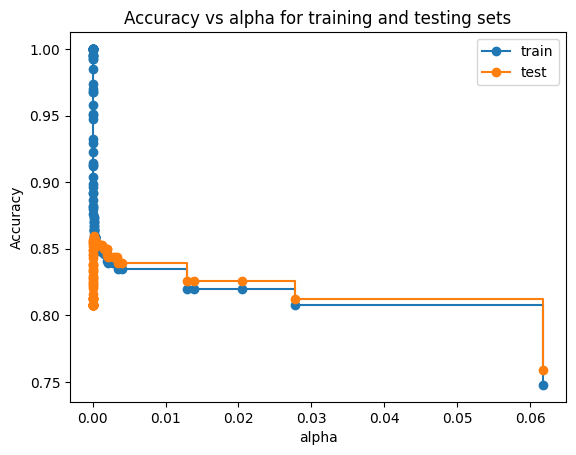

In [194]:
# Appending training accuracy
train_scores = [score[1] for score in Accuracy_Train]

# Appending test accuracy
test_scores = [score[1] for score in Accuracy_Test]

plt.figure(figsize=(10, 4))
# Plotting the figure
fig, ax = plt.subplots()

# Plotting train and test accuracy
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


In [196]:
from sklearn.tree import DecisionTreeClassifier

# Assuming you have determined the optimal ccp_alpha value for your final decision tree
optimal_ccp_alpha =  0.01

# Instantiate the final decision tree model with the optimal ccp_alpha
final_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=optimal_ccp_alpha)

# Fitting the final model on the training data
final_dt.fit(X_train, y_train)

# Predicting on the training data
Train_pred = final_dt.predict(X_train)

# Predicting on the test data
Test_pred = final_dt.predict(X_test)

# Print final test and train accuracy
print("Final Training Accuracy:", accuracy_score(y_train, Train_pred))
print("Final Test Accuracy:", accuracy_score(y_test, Test_pred))


Final Training Accuracy: 0.8344148155165064
Final Test Accuracy: 0.8393192617968837
